In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1482677%2F2449781%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241013%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241013T140908Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D67811577ec519603761c7eeaefe9536c4316bd27a855a688c059dd364b6cfddbf25e16c52d37c545fb8384534198cee8792d0c2004acaaf40d7918dec7dbc5a2115a8901d749b916758cb18747f7f67c750a2f6b563809eee40b0998a78d3979f3324168572c7b8cbb41ad8351150414107dba1129524edee63ca0f609fcfeb5ebbe9b01c0f96fb0121340d814660ebbe60c529617858b166520de32799f1cfe5118e4e5090664b9591c2a5603fb0c3ce4471a65d1fe63cb00b7acddbdff6bf434ec9c8bc2333edec29b8a3ffef9cbdc1b052623f6924028121ccc9d64cb38d9e47486cd4e7ebd57145b9e51450a02c7697d128f99484ff6c731aa51cf8e93e2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3149994799 bytes downloaded
Downloaded and uncompressed: dataset
Data source import complete.


In [2]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, LayerNormalization, MultiHeadAttention, BatchNormalization, Flatten, Add, Input, Lambda
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

keras.config.disable_traceback_filtering()
tf.keras.backend.clear_session()

Created Succesfully!
Created Succesfully!
Created Succesfully!
4946
5072
5192
The Oral Cancer dataset has 5192 images.
The Oral Cancer dataset has 2 classes
The Oral Cancer dataset has: 

Class 'OSCC' has 2698 images
----------------------------------------------------------------------
Class 'Normal' has 2494 images
----------------------------------------------------------------------


Found 3634 validated image filenames belonging to 2 classes.
Found 779 validated image filenames belonging to 2 classes.
Found 779 validated image filenames belonging to 2 classes.
The Training Oral Cancer dataset has 3634 images.
The Validation Oral Cancer dataset has 779 images.
The Testing Oral Cancer dataset has 779 images.
The Training Oral Cancer dataset has 2 classes
The Validation Oral Cancer dataset has 2 classes
The Testing Oral Cancer dataset has 2 classes
The Training Oral Cancer dataset has: 

Class 'OSCC' has 1911 images
----------------------------------------------------------------------
Class 'Normal' has 1723 images
----------------------------------------------------------------------
The Validation Oral Cancer dataset has: 

Class 'Normal' has 382 images
----------------------------------------------------------------------
Class 'OSCC' has 397 images
----------------------------------------------------------------------
The Testing Oral Cancer dataset has: 

Class

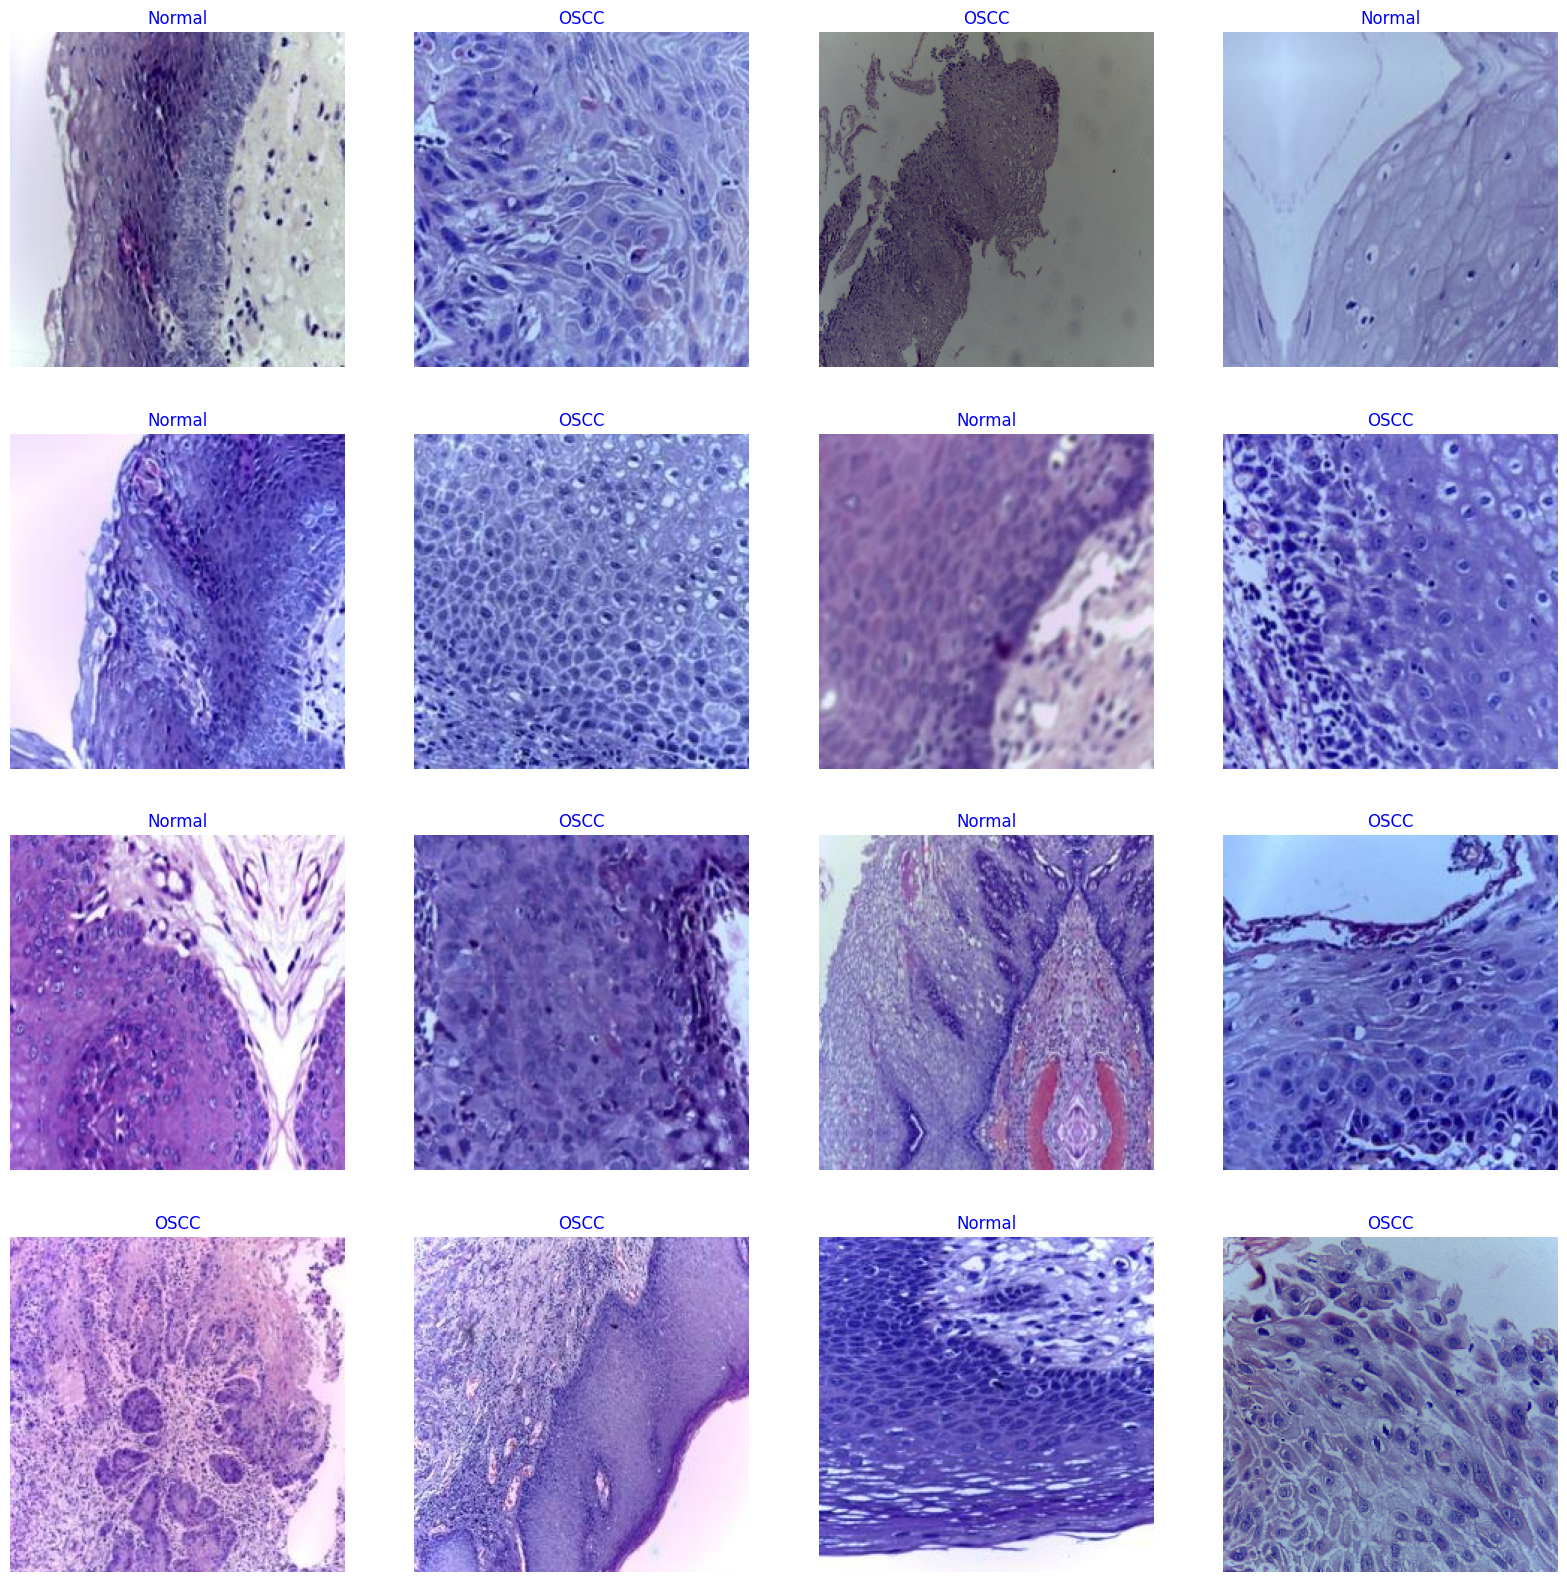

In [3]:

#paths
train_data_path = '/kaggle/input/dataset/train'
test_data_path = '/kaggle/input/dataset/test'
valid_data_path = '/kaggle/input/dataset/val'

labels = os.listdir(valid_data_path)

data_path = '/kaggle/working/data'

if not os.path.exists(data_path):
    os.mkdir(data_path)
    print("Created Succesfully!")
else:
    print("Folder already exists")

normal_data_path = '/kaggle/working/data/Normal'
oscc_data_path = '/kaggle/working/data/OSCC'

if not os.path.exists(normal_data_path):
    os.mkdir(normal_data_path)
    print("Created Succesfully!")
else:
    print("Folder already exists")

if not os.path.exists(oscc_data_path):
    os.mkdir(oscc_data_path)
    print("Created Succesfully!")
else:
    print("Folder already exists")

def move_data(d_path, saved_path):
    for i in labels:
        images = os.listdir(d_path + '/' + i)
        for j in images:
            path = d_path +'/' + i
            img = cv2.imread(path + '/' + j)
            s_path = saved_path + '/' + i + '/' + j
            cv2.imwrite(s_path, img)

move_data(train_data_path, data_path)

norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

move_data(test_data_path, data_path)

norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

move_data(valid_data_path, data_path)

norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

data_dir = '/kaggle/working/data'
ds_name = 'Oral Cancer'

# Generate data paths with labels

def generate_data_paths(data_dir):

    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


filepaths, labels = generate_data_paths(data_dir)

def create_df(filepaths, labels):

    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)
    return df

df = create_df(filepaths, labels)

#df.head()

def num_of_examples(df, name='df'):
    print(f"The {name} dataset has {df.shape[0]} images.")

num_of_examples(df, ds_name)

def num_of_classes(df, name='df'):
    print(f"The {name} dataset has {len(df['labels'].unique())} classes")

num_of_classes(df, ds_name)

def classes_count(df, name='df'):

    print(f"The {name} dataset has: ")
    print("="*70)
    print()
    for name in df['labels'].unique():
        num_class = len(df['labels'][df['labels'] == name])
        print(f"Class '{name}' has {num_class} images")
        print('-'*70)

classes_count(df, ds_name)

def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

cat_summary_with_graph(df,'labels')


# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.7, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)

# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                           horizontal_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe(train_df,
                                       x_col= 'filepaths',
                                       y_col= 'labels',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df,
                                       x_col= 'filepaths',
                                       y_col= 'labels',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe(test_df,
                                      x_col= 'filepaths',
                                      y_col= 'labels',
                                      target_size= img_size,
                                      class_mode= 'categorical',
                                      color_mode= 'rgb',
                                      shuffle= False,
                                      batch_size= test_batch_size)

g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

num_of_examples(train_df, "Training "+ds_name)
num_of_examples(valid_df, "Validation "+ds_name)
num_of_examples(test_df, "Testing "+ds_name)
num_of_classes(train_df, "Training "+ds_name)
num_of_classes(valid_df, "Validation "+ds_name)
num_of_classes(test_df, "Testing "+ds_name)

classes_count(train_df, 'Training '+ds_name)

classes_count(valid_df, 'Validation '+ds_name)

classes_count(test_df, 'Testing '+ds_name)

plt.figure(figsize= (20, 20))

for i in range(16):

    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')

plt.show()

In [5]:
# Transformer Block
def transformer_block(inputs, num_heads, ff_dim, dropout_rate):
    # Multi-Head Self Attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = Add()([inputs, attention_output])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)

    # Feed Forward Network
    ff_output = Dense(ff_dim, activation='relu')(attention_output)
    ff_output = Dropout(dropout_rate)(ff_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    ff_output = Add()([attention_output, ff_output])
    ff_output = LayerNormalization(epsilon=1e-6)(ff_output)

    return ff_output
# weights_path = 'path/to/efficientnetb3_notop.h5'
# base_model = EfficientNetB3(weights=weights_path, include_top=False, input_shape=img_shape, pooling='max')


# Load the EfficientNetB3 model without the top layers
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape= img_shape, pooling= 'max')

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-20:]:
    layer.trainable = True

# Add custom layers on top
x = base_model.output

# Reshape for Transformer using Lambda
x = Lambda(lambda x: tf.expand_dims(x, axis=1))(x)  # Adding a sequence dimension

# Add Transformer layers
x = transformer_block(x, num_heads=8, ff_dim=2048, dropout_rate=0.25)  # Customize heads and dimensions as needed

# Flatten after Transformer
x = Flatten()(x)

x = BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001)(x)
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.03))(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.03))(x)
x = Dropout(0.3)(x)
outputs = Dense(2, activation= 'softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=Adamax(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True),
    EarlyStopping(monitor='val_accuracy', patience=7, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model.weights.h5', monitor='val_loss', save_best_only=True, verbose=1, save_weights_only=True)
]

batch_size = 128   # set batch size for training
epochs = 50 # number of all epochs in training

# Train the model
history = model.fit(
    x=train_gen,
    #steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_data=valid_gen,
    validation_steps=None,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)

model.save_weights('my_model.weights.h5')

Epoch 1/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.6248 - loss: 39.8156
Epoch 1: val_loss improved from inf to 13.16135, saving model to best_model.weights.h5
228/228 ━━━━━━━━━━━━━━━━━━━━ 146s 447ms/step - accuracy: 0.6252 - loss: 39.7668 - val_accuracy: 0.8472 - val_loss: 13.1613 - learning_rate: 0.0010
Epoch 2/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8387 - loss: 9.9496
Epoch 2: val_loss improved from 13.16135 to 3.71175, saving model to best_model.weights.h5
228/228 ━━━━━━━━━━━━━━━━━━━━ 64s 278ms/step - accuracy: 0.8387 - loss: 9.9388 - val_accuracy: 0.9037 - val_loss: 3.7118 - learning_rate: 0.0010
Epoch 3/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8835 - loss: 2.8844
Epoch 3: val_loss improved from 3.71175 to 1.21270, saving model to best_model.weights.h5
228/228 ━━━━━━━━━━━━━━━━━━━━ 67s 210ms/step - accuracy: 0.8835 - loss: 2.8816 - val_accuracy: 0.9101 - val_loss: 1.2127 - learning_rate: 0.0010
Epoch 4/50
228/228 ━━━━━━━━━━━━━

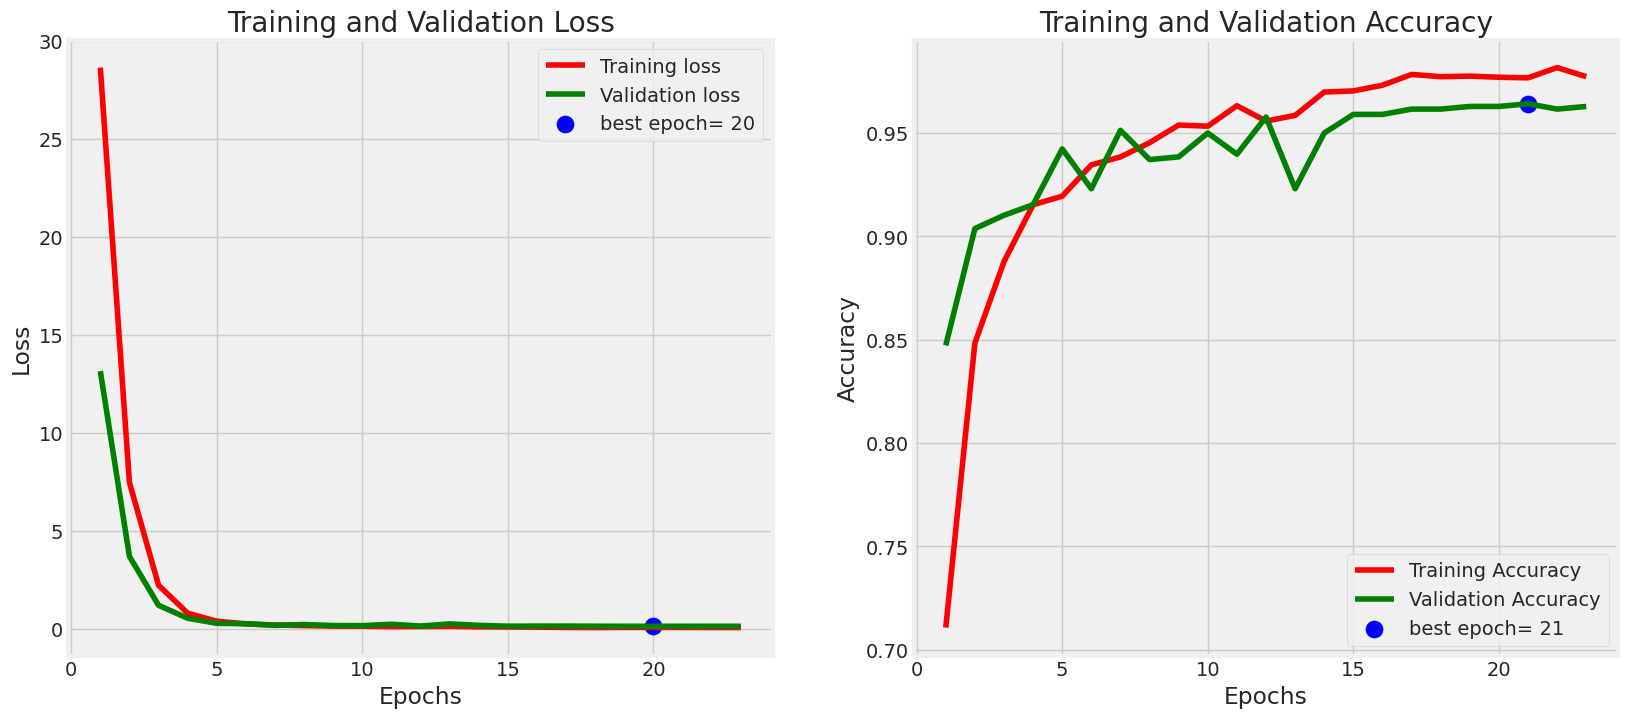

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.9890 - loss: 0.0613
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9714 - loss: 0.0848
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 466ms/step - accuracy: 0.9748 - loss: 0.0950
Train Loss:  0.04789624735713005
Train Accuracy:  0.9901315569877625
--------------------
Validation Loss:  0.10063993185758591
Validation Accuracy:  0.9671052694320679
--------------------
Test Loss:  0.13508090376853943
Test Accuracy:  0.9691912531852722
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 286ms/step


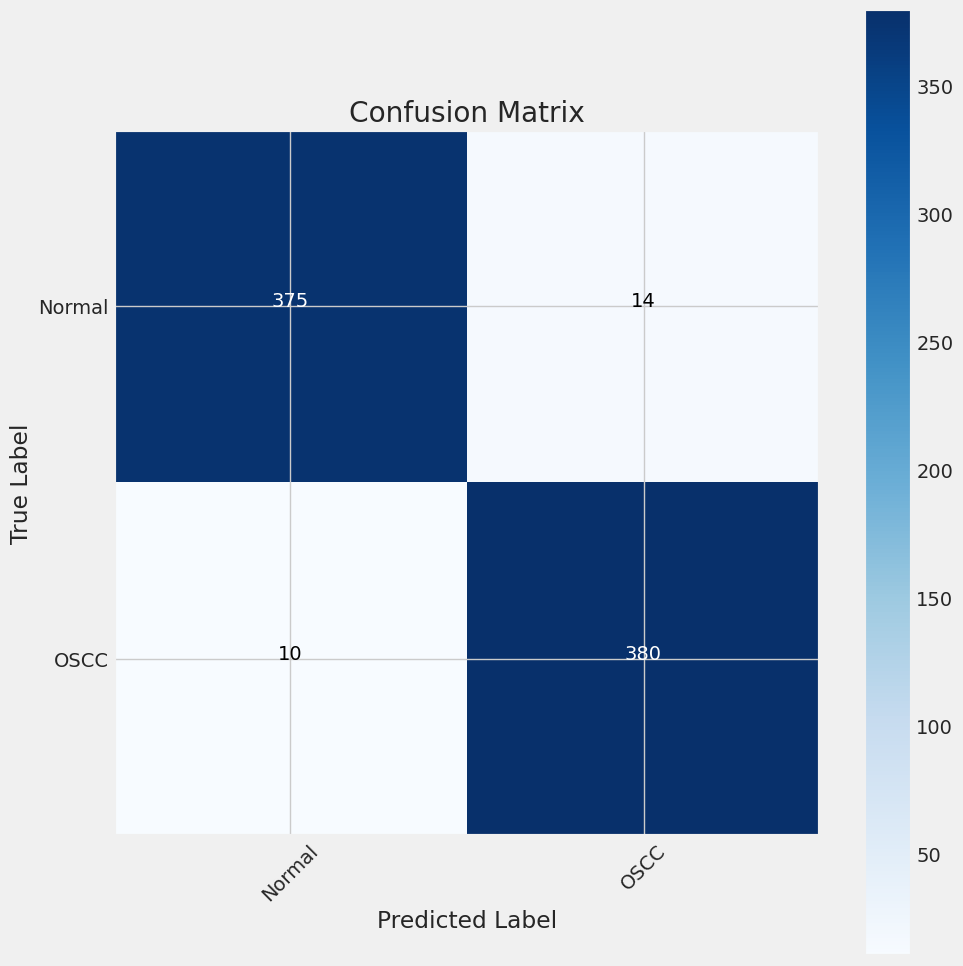

              precision    recall  f1-score   support

      Normal       0.97      0.96      0.97       389
        OSCC       0.96      0.97      0.97       390

    accuracy                           0.97       779
   macro avg       0.97      0.97      0.97       779
weighted avg       0.97      0.97      0.97       779



In [6]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [7]:
print(y_pred)

[1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0
 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0
 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


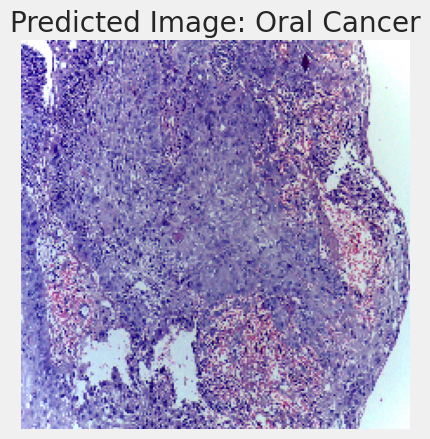

In [14]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model, class_labels):

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    predicted_class_label = class_labels[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Image: {predicted_class_label}")
    plt.show()

# Load your trained model
model.load_weights('/my_model.weights.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = ['Normal', 'Oral Cancer']

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = '/kaggle/input/dataset/test/OSCC/OSCC_100x_199.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


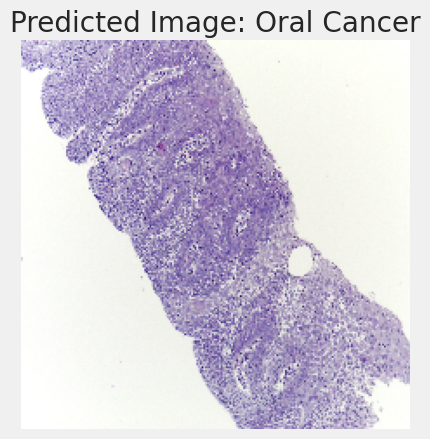

In [15]:
image_path_to_test = '/kaggle/input/dataset/train/OSCC/OSCC_100x_2.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


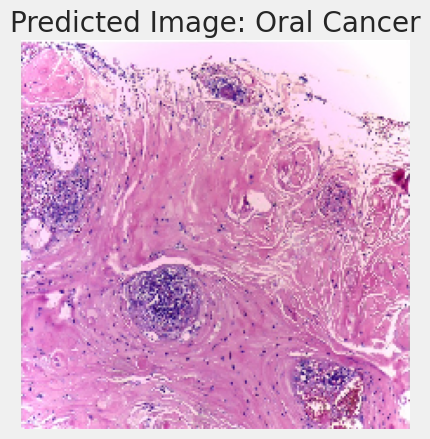

In [16]:
image_path_to_test = '/content/test.jpeg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


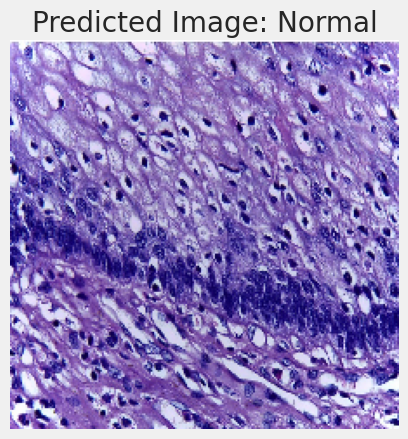

In [17]:
image_path_to_test = '/content/test2.jpeg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


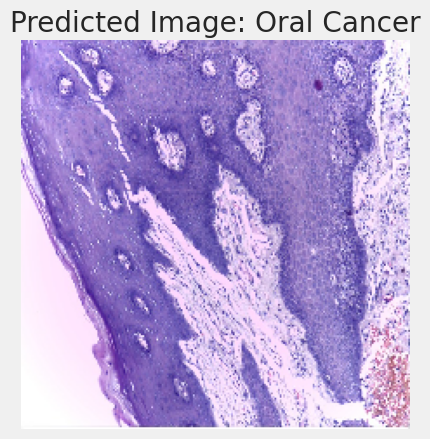

In [18]:
image_path_to_test = '/content/test3.jpeg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


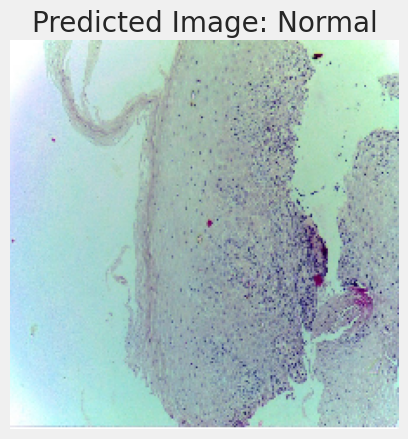

In [19]:
image_path_to_test = '/content/test4.jpeg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


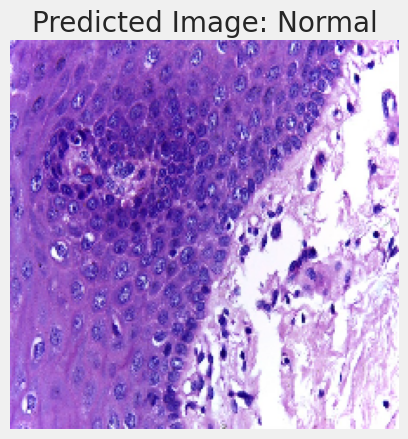

In [20]:
image_path_to_test = '/content/test5.jpeg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


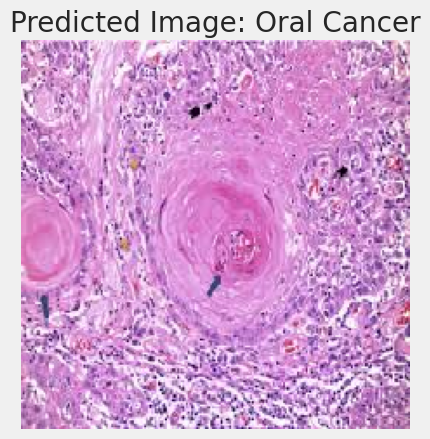

In [21]:
image_path_to_test = '/content/test6mk.jpeg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


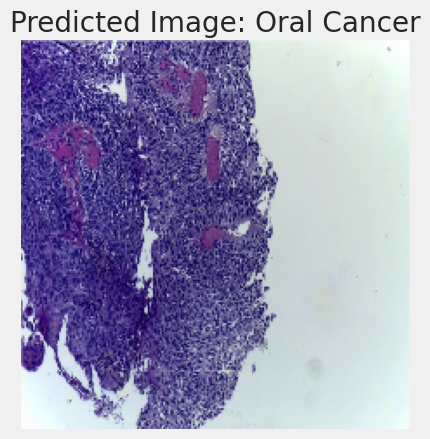

In [24]:
image_path_to_test = '/content/test7.jpeg'
predict_and_display(image_path_to_test, model, class_labels)